In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
df_wine = pd.read_csv('\winequality-red.csv', sep=';')

In [3]:
df_wine.loc[:, 'quality_cat'] = (df_wine.quality >5).astype(int)
df_wine = df_wine.drop('quality', axis =1)

In [4]:
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

In [5]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
#SKLEARN PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components= 6)

In [8]:
pca.fit(X)

PCA(n_components=6)

In [9]:
Z = pca.transform(X)

In [10]:
Z.shape

(1599, 6)

In [12]:
pca.components_.shape

(6, 11)

In [16]:
Z[:10]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939,  -0.30132496],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355,  -0.20511367],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573,   0.08909173],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ -6.93400027,  -1.38790176,  -1.12127705,  -0.56009974,
         -1.01986846,  -0.1768873 ],
       [ 12.03682832,  -3.61177553,  -0.67163691,  -1.00390299,
         -0.75505874,  -0.17925554],
       [-25.04255804,   4.72607199,  -1.33781652,  -0.94957702,
         -0.552435  ,  -0.21395213],
       [-29.2756982 ,  -0.47905559,  -0.72624845,  -0.28935942,
         -1.11137314,  -0.10349532],
       [ 54.46316749, -10.99931637,   0.16155938,   3.34519729,
         -0.06094772,   0.1

In [18]:
X_ = X - X.mean(axis=0)

In [19]:
X_.dot(pca.components_.T)

array([[-1.32249050e+01, -2.02389981e+00, -1.12682053e+00,
        -3.99233183e-01, -1.08538902e+00, -1.98017553e-01],
       [ 2.20377236e+01,  4.40832155e+00, -3.10377987e-01,
        -1.99937740e-01, -5.57109394e-01, -3.01324964e-01],
       [ 7.16267333e+00, -2.50146086e+00, -5.81868296e-01,
        -2.19069278e-01, -5.52933551e-01, -2.05113668e-01],
       ...,
       [-3.43135351e+00,  1.42712435e+01, -1.75071927e+00,
         1.74652190e-01,  2.36270522e-01,  8.95128040e-02],
       [ 1.13287834e+00,  1.63161673e+01, -2.13441396e+00,
        -2.35387962e-01, -5.19027681e-01,  1.55484011e-02],
       [-3.87437660e+00,  3.12634754e+00, -1.87414925e+00,
         1.70067390e+00,  1.04329744e-01,  4.00244077e-01]])

In [20]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [ ]:
# SVD

In [21]:
from numpy.linalg import svd

In [22]:
u, s , vt = svd(X_, full_matrices=0)

In [23]:
u.shape

(1599, 11)

In [24]:
s.shape

(11,)

In [25]:
vt.shape

(11, 11)

In [28]:
S = np.diag(s)

In [29]:
X_svd = u.dot(S).dot(vt)

In [32]:
((X_svd - X_)**2).sum()

2.727162182681518e-24

In [35]:
v = vt[:6].T

In [36]:
Z_svd = X_.dot(v)

In [37]:
Z_svd[:10]

array([[ 13.22490501,  -2.02389981,   1.12682053,   0.39923318,
          1.08538902,   0.19801755],
       [-22.03772361,   4.40832155,   0.31037799,   0.19993774,
          0.55710939,   0.30132496],
       [ -7.16267333,  -2.50146086,   0.5818683 ,   0.21906928,
          0.55293355,   0.20511367],
       [-13.43006283,  -1.95112215,  -2.63403954,   1.5740594 ,
          0.06380573,  -0.08909173],
       [ 13.22490501,  -2.02389981,   1.12682053,   0.39923318,
          1.08538902,   0.19801755],
       [  6.93400027,  -1.38790176,   1.12127705,   0.56009974,
          1.01986846,   0.1768873 ],
       [-12.03682832,  -3.61177553,   0.67163691,   1.00390299,
          0.75505874,   0.17925554],
       [ 25.04255804,   4.72607199,   1.33781652,   0.94957702,
          0.552435  ,   0.21395213],
       [ 29.2756982 ,  -0.47905559,   0.72624845,   0.28935942,
          1.11137314,   0.10349532],
       [-54.46316749, -10.99931637,  -0.16155938,  -3.34519729,
          0.06094772,  -0.1

In [38]:
Z[:10]

array([[-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ 22.03772361,   4.40832155,  -0.31037799,  -0.19993774,
         -0.55710939,  -0.30132496],
       [  7.16267333,  -2.50146086,  -0.5818683 ,  -0.21906928,
         -0.55293355,  -0.20511367],
       [ 13.43006283,  -1.95112215,   2.63403954,  -1.5740594 ,
         -0.06380573,   0.08909173],
       [-13.22490501,  -2.02389981,  -1.12682053,  -0.39923318,
         -1.08538902,  -0.19801755],
       [ -6.93400027,  -1.38790176,  -1.12127705,  -0.56009974,
         -1.01986846,  -0.1768873 ],
       [ 12.03682832,  -3.61177553,  -0.67163691,  -1.00390299,
         -0.75505874,  -0.17925554],
       [-25.04255804,   4.72607199,  -1.33781652,  -0.94957702,
         -0.552435  ,  -0.21395213],
       [-29.2756982 ,  -0.47905559,  -0.72624845,  -0.28935942,
         -1.11137314,  -0.10349532],
       [ 54.46316749, -10.99931637,   0.16155938,   3.34519729,
         -0.06094772,   0.1

In [40]:
#EIG

In [41]:
from numpy.linalg import eig

In [42]:
C = X_.T.dot(X_)

In [43]:
lamb, W = eig(C)

In [44]:
lamb

array([1.81182371e+06, 9.25807864e+04, 4.95588105e+03, 2.90742567e+03,
       1.67205190e+03, 6.61519736e+01, 3.70618671e+01, 1.81316567e+01,
       1.61046186e+01, 2.32508608e+00, 8.97249302e-04])

In [45]:
W[:10]

array([[ 6.13247431e-03, -2.38994985e-02,  9.53135980e-01,
         2.65092214e-01,  9.81476468e-02,  7.93123729e-02,
         1.11415873e-02,  6.49066070e-02, -1.62056112e-02,
         1.11894679e-02, -9.42137146e-04],
       [-3.84465551e-04, -2.00966661e-03, -2.51315387e-02,
        -7.27374987e-03, -4.11570558e-02,  6.89241790e-01,
         4.64366208e-01, -3.38841054e-01,  4.28631866e-01,
        -9.15867655e-02, -7.18832280e-04],
       [-1.70902595e-04, -3.03480788e-03,  7.37082746e-02,
         9.83215158e-03,  4.14815020e-02, -5.04044257e-01,
        -2.05507873e-01, -3.27123399e-01,  7.60466107e-01,
        -1.05489073e-01, -5.84467646e-05],
       [-8.64894648e-03,  1.11348551e-02,  2.80913620e-01,
        -9.43177990e-01, -1.76626862e-01, -5.76573957e-03,
         2.49458552e-03,  4.13432131e-03, -6.93128776e-03,
        -1.48602896e-03, -4.12747476e-04],
       [-6.37307290e-05, -2.36654751e-04,  2.94578815e-03,
         6.45262673e-04, -9.47985067e-03, -5.70159846e-02,
  

In [46]:
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [48]:
lamb/lamb.sum()

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05, 1.93627614e-05, 9.47278079e-06,
       8.41376628e-06, 1.21472798e-06, 4.68762788e-10])

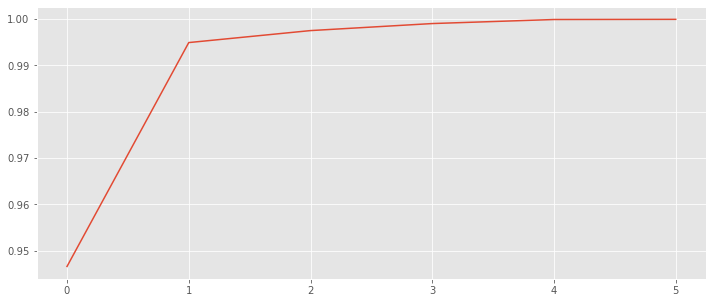

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [50]:
#Quality analysis

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [52]:
model_baseline = Pipeline([
   ('scaler', StandardScaler()),
   ('clf', LogisticRegression())
])

In [53]:
cv = StratifiedKFold(n_splits=5, shuffle= True, random_state=123)

In [59]:
 base_score = cross_val_score(model_baseline, X, y, scoring= 'accuracy', cv=cv).mean()

In [57]:
k = range(1,12)
scores = []

for n in k:
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n)),
    ('clf', LogisticRegression())
    ])

    scores.append(cross_val_score(model, X, y, scoring= 'accuracy', cv=cv).mean())

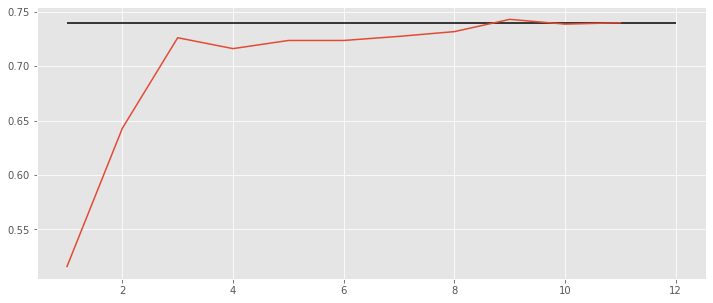

In [61]:
plt.plot(k, scores)
plt.hlines(base_score, 1, 12)